In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install seaborn 

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import shutil

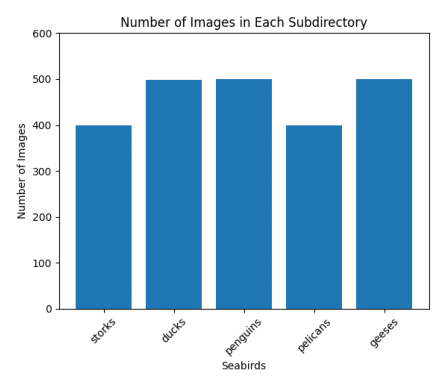

In [2]:
import os
import matplotlib.pyplot as plt

# Set the path to the "Seabirds" directory
seabirds_dir = 'SeaBirds'

# Get a list of subdirectories in the "Seabirds" directory
subdirectories = [name for name in os.listdir(
    seabirds_dir) if os.path.isdir(os.path.join(seabirds_dir, name))]

# Count the number of images in each subdirectory
image_counts = {}
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    image_files = [name for name in os.listdir(
        subdir_path) if os.path.isfile(os.path.join(subdir_path, name))]
    image_counts[subdir] = len(image_files)


#display image "eda_count" in eda_images
image_path = 'eda_images/eda_count.png'
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### Balancing the data

Looking at the data, we can see that the categories are not balanced, some searbirds have 500 images while some have 400. We will have to balance the data before training the model to prevent the model from being biased towards the categories with more images.

Storks = 400
Ducks = 400
Penguins = 400
Pelicans = 400
Geeses = 400


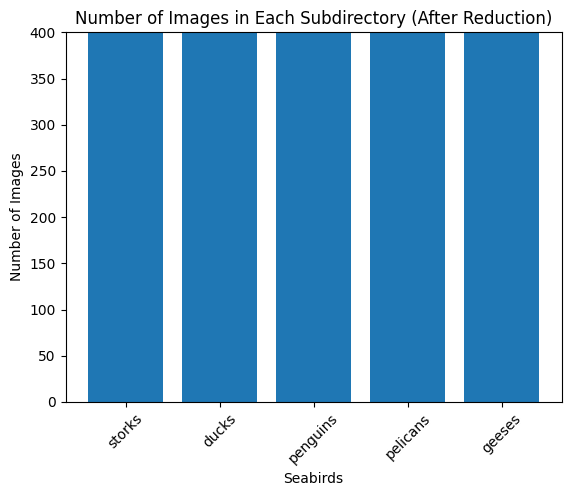

In [3]:
# Determine the target number of images (the lowest count among all categories)
target_count = min(image_counts.values())

# Identify categories with counts exceeding the target
excess_categories = [subdir for subdir,
                     count in image_counts.items() if count > target_count]

# Reduce the number of images for categories with more than the target count
for subdir in excess_categories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    images_to_keep = random.sample(os.listdir(subdir_path), target_count)

    # Move the selected images to a temporary directory
    temp_dir = './temp'
    os.makedirs(temp_dir, exist_ok=True)
    for image in images_to_keep:
        shutil.move(os.path.join(subdir_path, image),
                    os.path.join(temp_dir, image))

    # Remove the remaining images in the original directory
    for image in os.listdir(subdir_path):
        os.remove(os.path.join(subdir_path, image))

    # Move the selected images back to the original directory
    for image in os.listdir(temp_dir):
        shutil.move(os.path.join(temp_dir, image),
                    os.path.join(subdir_path, image))

    # Remove the temporary directory
    os.rmdir(temp_dir)

# Print the subdirectory names and the number of images in each after reduction
image_counts_after_reduction = {subdir: len(os.listdir(
    os.path.join(seabirds_dir, subdir))) for subdir in subdirectories}
for subdir, count in image_counts_after_reduction.items():
    print(f"{subdir.capitalize()} = {count}")

# Create a bar chart to visualize the image counts after reduction
plt.bar(image_counts_after_reduction.keys(),
        image_counts_after_reduction.values())
plt.xlabel('Seabirds')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subdirectory (After Reduction)')
plt.xticks(rotation=45)
plt.ylim(0, target_count)  # Set the y-axis limit to the target count
plt.show()

Category: Small
Storks = 0
Ducks = 0
Penguins = 0
Pelicans = 0
Geeses = 1
Category: Medium
Storks = 15
Ducks = 11
Penguins = 8
Pelicans = 9
Geeses = 18
Category: Large
Storks = 385
Ducks = 389
Penguins = 392
Pelicans = 391
Geeses = 381


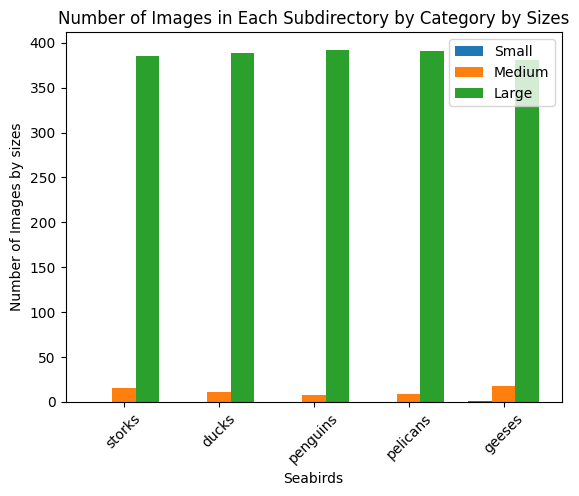

In [7]:
import os
import random
import shutil
import matplotlib.pyplot as plt

# Function to categorize image sizes into small, medium, and large


def categorize_image_size(image_path):
    # Implement your logic to determine the image size category
    # For example, you can use the image dimensions for simplicity
    # Modify this function based on your specific requirements
    # Here, I'm assuming 'small', 'medium', and 'large' based on width and height
    # Adjust the thresholds accordingly
    # You can replace this with actual size calculation
    image_size = os.path.getsize(image_path)
    if image_size < 10000:  # Adjust the threshold for 'small'
        return 'small'
    elif 10000 <= image_size < 50000:  # Adjust the thresholds for 'medium'
        return 'medium'
    else:
        return 'large'


# Define the categories
categories = ['small', 'medium', 'large']

# Dictionary to store image counts for each category
image_counts_by_category = {category: {
    subdir: 0 for subdir in subdirectories} for category in categories}

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)

    # Loop through each image in the subdirectory
    for image in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, image)

        # Categorize the image size
        size_category = categorize_image_size(image_path)

        # Increment the count for the corresponding category and subdirectory
        image_counts_by_category[size_category][subdir] += 1

# Print the image counts for each category and subdirectory
for category in categories:
    print(f"Category: {category.capitalize()}")
    for subdir, count in image_counts_by_category[category].items():
        print(f"{subdir.capitalize()} = {count}")

# Rest of the original code for image reduction and plotting
# ...

# Create a bar chart to visualize the image counts for each category
bar_width = 0.25
bar_positions = range(len(subdirectories))

for i, category in enumerate(categories):
    counts = [image_counts_by_category[category][subdir]
              for subdir in subdirectories]
    plt.bar([pos + i * bar_width for pos in bar_positions],
            counts, width=bar_width, label=category.capitalize())

plt.xlabel('Seabirds')
plt.ylabel('Number of Images by sizes')
plt.title('Number of Images in Each Subdirectory by Category by Sizes')
plt.xticks([pos + (len(categories) - 1) * bar_width /
           2 for pos in bar_positions], subdirectories, rotation=45)
plt.legend()
plt.show()